In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython import display
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import geopandas as gpd
import os

**<center><font size = "6">Teste Técnico de Engenharia de Dados - NYC Taxi Trips<center>**
***
<center><font size = "2">Rafael Gollner Bayao<center>

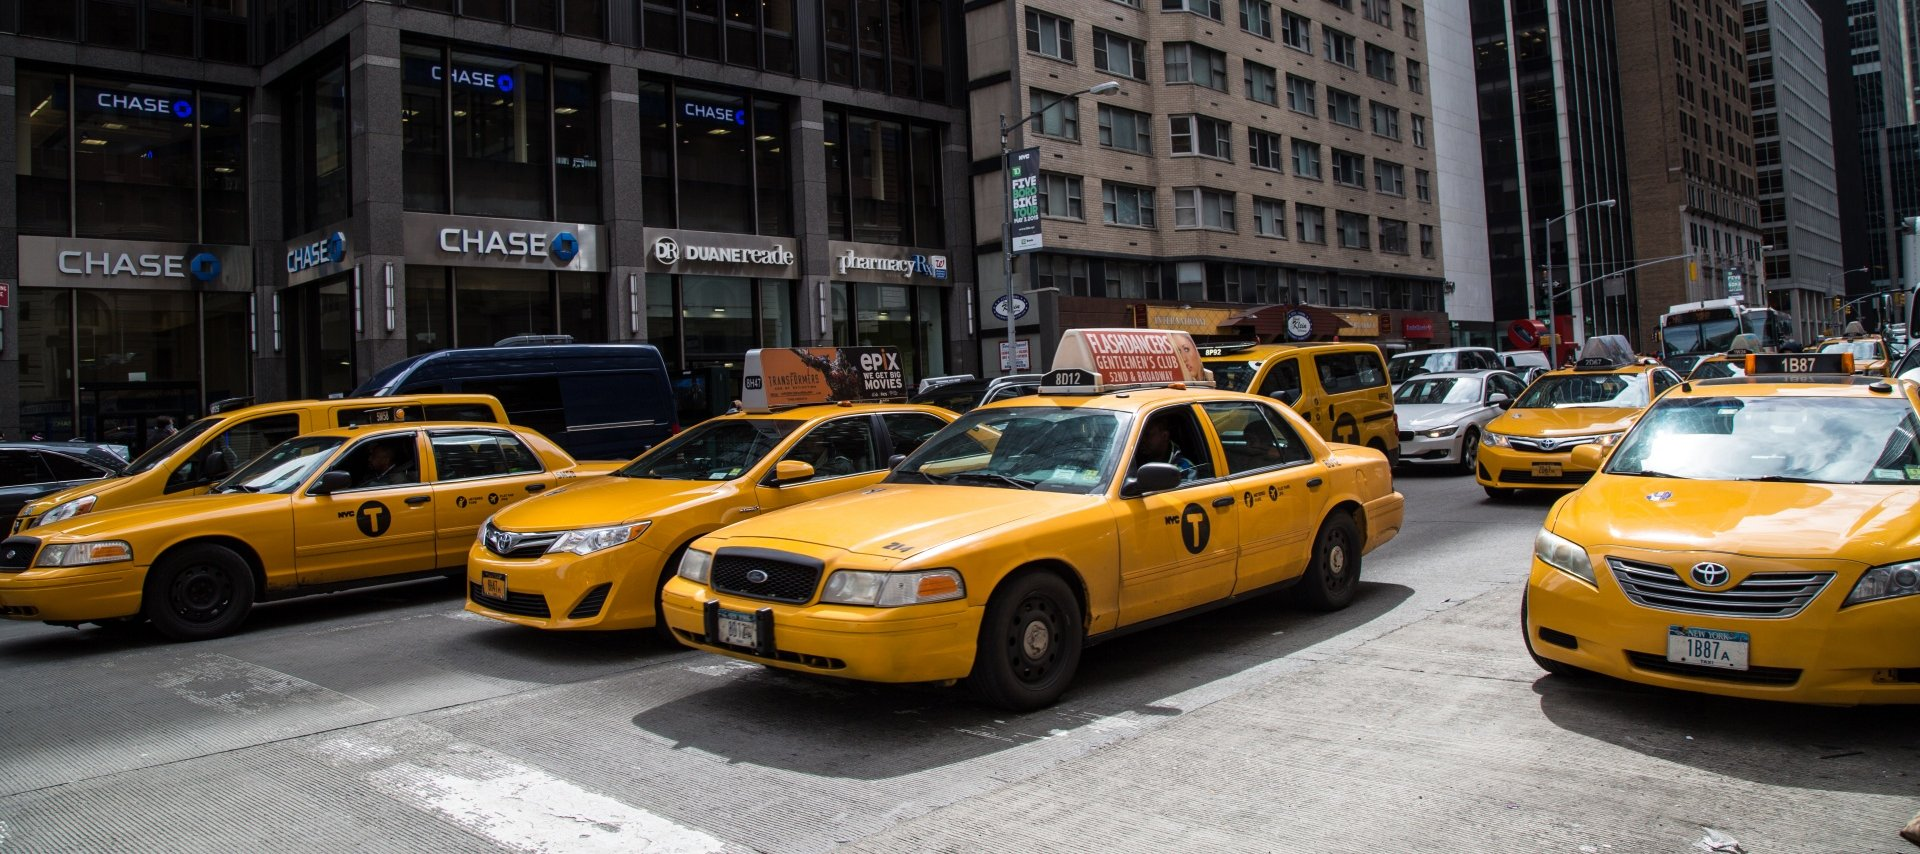

In [2]:
display.Image(os.path.join('.','images','nyc-yellow-taxi-1468140116IwG.jpg'), width = 2000)

***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descrição-dos-dados" data-toc-modified-id="Descrição-dos-dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descrição dos dados</a></span><ul class="toc-item"><li><span><a href="#Arquivos-Json" data-toc-modified-id="Arquivos-Json-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Arquivos Json</a></span><ul class="toc-item"><li><span><a href="#Colunas" data-toc-modified-id="Colunas-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Colunas</a></span></li></ul></li><li><span><a href="#Demais-arquivos" data-toc-modified-id="Demais-arquivos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Demais arquivos</a></span><ul class="toc-item"><li><span><a href="#Colunas---data-vendor_lookup-csv.csv" data-toc-modified-id="Colunas---data-vendor_lookup-csv.csv-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Colunas - data-vendor_lookup-csv.csv</a></span></li><li><span><a href="#Colunas---data-payment_lookup-csv.csv" data-toc-modified-id="Colunas---data-payment_lookup-csv.csv-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Colunas - data-payment_lookup-csv.csv</a></span></li></ul></li></ul></li><li><span><a href="#Estratégia-de-leitura" data-toc-modified-id="Estratégia-de-leitura-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estratégia de leitura</a></span><ul class="toc-item"><li><span><a href="#Arquivos-.json" data-toc-modified-id="Arquivos-.json-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Arquivos .json</a></span><ul class="toc-item"><li><span><a href="#SQL-Table" data-toc-modified-id="SQL-Table-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>SQL Table</a></span></li></ul></li><li><span><a href="#Demais-arquivos" data-toc-modified-id="Demais-arquivos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Demais arquivos</a></span><ul class="toc-item"><li><span><a href="#SQL-Table---data-vendor_lookup-csv.csv" data-toc-modified-id="SQL-Table---data-vendor_lookup-csv.csv-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>SQL Table - data-vendor_lookup-csv.csv</a></span></li><li><span><a href="#SQL-Table---data-payment_lookup-csv.csv" data-toc-modified-id="SQL-Table---data-payment_lookup-csv.csv-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>SQL Table - data-payment_lookup-csv.csv</a></span></li></ul></li></ul></li><li><span><a href="#Outras-considerações" data-toc-modified-id="Outras-considerações-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Outras considerações</a></span></li><li><span><a href="#Quesitos-mínimos" data-toc-modified-id="Quesitos-mínimos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quesitos mínimos</a></span><ul class="toc-item"><li><span><a href="#Qual-a-distância-média-percorrida-por-viagens-com-no-máximo-2-passageiros;" data-toc-modified-id="Qual-a-distância-média-percorrida-por-viagens-com-no-máximo-2-passageiros;-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Qual a distância média percorrida por viagens com no máximo 2 passageiros;</a></span></li><li><span><a href="#Quais-os-3-maiores-vendors-em-quantidade-total-de-dinheiro-arrecadado;" data-toc-modified-id="Quais-os-3-maiores-vendors-em-quantidade-total-de-dinheiro-arrecadado;-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Quais os 3 maiores vendors em quantidade total de dinheiro arrecadado;</a></span></li><li><span><a href="#Faça-um-histograma-da-distribuição-mensal,-nos-4-anos,-de-corridas-pagas-em-dinheiro;" data-toc-modified-id="Faça-um-histograma-da-distribuição-mensal,-nos-4-anos,-de-corridas-pagas-em-dinheiro;-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Faça um histograma da distribuição mensal, nos 4 anos, de corridas pagas em dinheiro;</a></span></li><li><span><a href="#Faça-um-gráfico-de-série-temporal-contando-a-quantidade-de-gorjetas-de-cada-dia,-nos-últimos-3-meses-de-2012." data-toc-modified-id="Faça-um-gráfico-de-série-temporal-contando-a-quantidade-de-gorjetas-de-cada-dia,-nos-últimos-3-meses-de-2012.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Faça um gráfico de série temporal contando a quantidade de gorjetas de cada dia, nos últimos 3 meses de 2012.</a></span></li></ul></li><li><span><a href="#Quesitos-bônus" data-toc-modified-id="Quesitos-bônus-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Quesitos bônus</a></span><ul class="toc-item"><li><span><a href="#Qual-o-tempo-médio-das-corridas-nos-dias-de-sábado-e-domingo;" data-toc-modified-id="Qual-o-tempo-médio-das-corridas-nos-dias-de-sábado-e-domingo;-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Qual o tempo médio das corridas nos dias de sábado e domingo;</a></span></li><li><span><a href="#Fazer-uma-visualização-em-mapa-com-latitude-e-longitude-de-pickups-and-dropoffs-no-ano-de-2010;" data-toc-modified-id="Fazer-uma-visualização-em-mapa-com-latitude-e-longitude-de-pickups-and-dropoffs-no-ano-de-2010;-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fazer uma visualização em mapa com latitude e longitude de pickups and dropoffs no ano de 2010;</a></span></li></ul></li></ul></div>

***

## Descrição dos dados

### Arquivos Json

- data-sample_data-nyctaxi-trips-2009-json_corrigido.json
- data-sample_data-nyctaxi-trips-2010-json_corrigido.json
- data-sample_data-nyctaxi-trips-2011-json_corrigido.json
- data-sample_data-nyctaxi-trips-2012-json_corrigido.json

#### Colunas

- vendor_id:str - tag da empresa responsável.
- pickup_datetime:datetime - Data e hora de embarque. Formato ISO.
- dropoff_datetime:datetime - Data e hora de desembarque. Formato ISO.
- passenger_count:int - Número de passageiros.
- trip_distance:float - Distância percorrida.
- pickup_longitude:float - Longitude de embarque.
- pickup_latitude:float - Latidude de embarque.
- dropoff_longitude:float - Longitude de desembarque.
- dropoff_latitude:float - latitude de desembarque.
- payment_type:str - Tipo de pagamento.
- fare_amount:float - Valor da viagem.
- surcharge:float - Custo extra.
- tip_amount:float - Gorjeta.
- tolls_amount:float - Pegágios.
- total_amount:float - Valor total.


### Demais arquivos

- data-payment_lookup-csv.csv - Informações sobre variadas formas de escrever o método de pagamento
- data-vendor_lookup-csv.csv - Informações sobre os vendedores

#### Colunas - data-vendor_lookup-csv.csv 

- vendor_id:str - Sigla da empresa.
- name:str - Nome da empresa.
- address:str - Endereço da empresa.
- city:str - Cidade da empresa.
- state:str - Estado da empresa.
- zip:int - Código postal da empresa.
- country:str - País da empresa.
- contact:str - Email ou telefone de contato.
- current:str - Se a empresa está ativa.

#### Colunas - data-payment_lookup-csv.csv

- payment_type:str - Sigla usada para o pagamento.
- payment_lookup:str - Valor correspondente à sigla

***

## Estratégia de leitura

Em vista da quantidade de dados, o armazenamento em pandas pode ser muito custuso, além disso armazená-lo em memória RAM exige recarregar todos os dados a cada inicialização, o que é um inconveniente pois em testes verificou-se que a leitura dos arquivos json para DataFrame pode chegar a demorar quase 1 minuto.

Apesar disso, por não ter uma grande complexidade de dados o uso de SQLite é uma solução simples e rápida para resolver a situação. Sendo implementado como descrito a seguir.

### Arquivos .json

Possuir o conjunto inteiro registrado tornou, por questões de performance, a opção pela leitura e escrita completa dos arquivos mais interessante que tradução individual dos dados. Dessa forma utilizou-se o pandas para criar a tabela de viagens completa em SQL.

#### SQL Table

Título da tabela: rides_hist

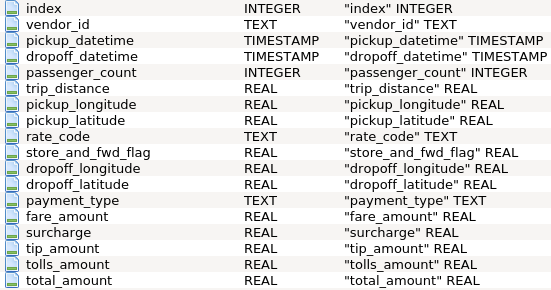

In [3]:
display.Image(os.path.join('.','images','ride_hist_table.png'))

### Demais arquivos

As demais tabelas foram inseridas no banco de dados a partir de uma biblioteca desenvolvida para o correspondente proposito, permitindo maior personalização dos inputs.

#### SQL Table - data-vendor_lookup-csv.csv 

Título da tabela: vendors

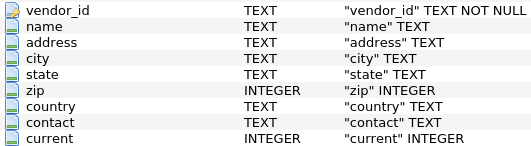

In [4]:
display.Image(os.path.join('.','images','vendors_table.png'))

#### SQL Table - data-payment_lookup-csv.csv

Título da tabela: payment_lookup

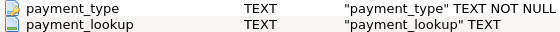

In [5]:
display.Image(os.path.join('.','images','payment_table.png'))

***

## Outras considerações

Foi determinada uma função de apoio para execução das queries para garantia de abertura e fechamento adequado do banco de dados, assim durante as execuções o banco de dados não fica aberto desnecessáriamente e evita-se que ele permaneça aberto após erros de execução.

***

## Quesitos mínimos

In [6]:
from sql_parser.contents import fetch_database

### Qual a distância média percorrida por viagens com no máximo 2 passageiros;

In [7]:
statement = '''
SELECT AVG(ride_hist.trip_distance) AS media, MAX(ride_hist.trip_distance) AS maximo, MIN(ride_hist.trip_distance) AS minimo 
FROM ride_hist 
WHERE 
passenger_count <= 2
and
trip_distance != 0'''

result, description = fetch_database(os.path.join('.','data','NYC_taxi.db'), statement)

print(f'Descartando viagens com distancia igual a 0.\nTemos que a média com 2 ou menos passageiros é igual: {result[0][0]:.2f}')

Descartando viagens com distancia igual a 0.
Temos que a média com 2 ou menos passageiros é igual: 2.69


Esse valor é bem próximo do encontrado com qualquer número de passageiros, a tabela abaixo mostra uma comparação.
Considerando que nos EUA só se embarca no banco traseiro de um taxi, os resultados são condizentes.

In [8]:
distance = pd.DataFrame(result, columns=['Média', 'Máximo', 'Mínimo'], index=['2 ou menos passageiros'])
statement = '''
SELECT AVG(ride_hist.trip_distance) AS media, MAX(ride_hist.trip_distance) AS maximo, MIN(ride_hist.trip_distance) AS minimo 
FROM ride_hist 
WHERE 
trip_distance != 0
'''
result, description = fetch_database(os.path.join('.','data','NYC_taxi.db'), statement)

other = pd.DataFrame(result, columns=['Média', 'Máximo', 'Mínimo'], index=['qualquer quantidade'])
distance = distance.append(other)
statement = '''
SELECT COUNT(ride_hist.trip_distance)
FROM ride_hist 
WHERE 
passenger_count <= 2
AND
trip_distance == 0
'''
ride_0_2, description = fetch_database(os.path.join('.','data','NYC_taxi.db'), statement)

statement = '''
SELECT COUNT(ride_hist.trip_distance)
FROM ride_hist 
WHERE 
trip_distance == 0
'''
ride_0_tot, description = fetch_database(os.path.join('.','data','NYC_taxi.db'), statement)

distance['Corridas de distância 0'] = [ride_0_2[0][0],ride_0_tot[0][0]]
distance

,Média,Máximo,Mínimo,Corridas de distância 0
2 ou menos passageiros,2.688017,49.70,0.002,31480
qualquer quantidade,2.701897,49.92,0.002,35068


### Quais os 3 maiores vendors em quantidade total de dinheiro arrecadado;

In [9]:
statement = '''
SELECT 
vendor_id, SUM(total_amount) AS total 
FROM 
ride_hist 
GROUP BY vendor_id
ORDER BY total DESC 
LIMIT 3
'''
result, description = fetch_database(os.path.join('.','data','NYC_taxi.db'), statement)
    
pd.DataFrame(data=result, columns=[i[0] for i in description])

,vendor_id,total
0,CMT,1.954908e+07
1,VTS,1.904343e+07
2,DDS,2.714902e+06


### Faça um histograma da distribuição mensal, nos 4 anos, de corridas pagas em dinheiro;

Para essa foi necessário relacionar as tabelas de corrida com de payment_lookup, pois haviam diferentes strings usados para "Cash", como "CASH" e "Cash".

In [10]:
fontsize=12

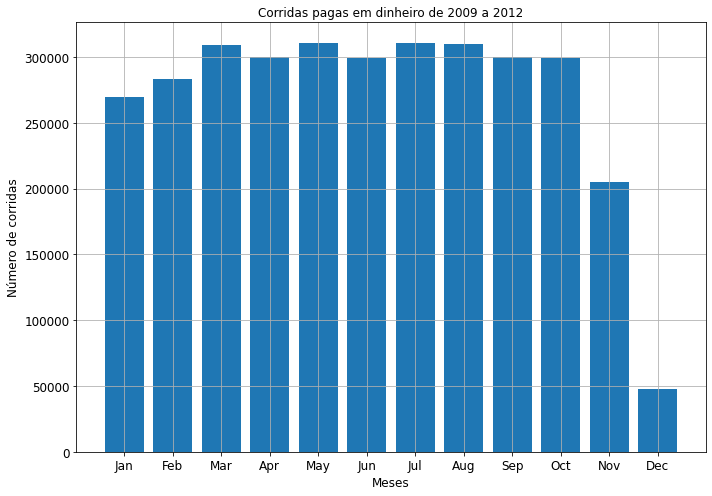

In [11]:
statement = '''
SELECT strftime("%m", pickup_datetime) AS Month, COUNT('vendor_id') AS num_of_cash_transactions
FROM ride_hist
WHERE 
payment_type IN (SELECT payment_type FROM payment_lookup WHERE payment_lookup == 'Cash')
GROUP BY strftime("%m", pickup_datetime)
'''

month_cash_pays, description = fetch_database(os.path.join('.','data','NYC_taxi.db'), statement)
fig = plt.figure(figsize = (10,7))
x = [k for k,v in month_cash_pays]
y = [v for k,v in month_cash_pays]
plt.bar(x,y)
plt.xticks(range(0,12), [calendar.month_abbr[i] for i in range(1,13)], fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Meses', fontsize=fontsize)
plt.ylabel('Número de corridas', fontsize=fontsize)
plt.title('Corridas pagas em dinheiro de 2009 a 2012')
plt.grid()
fig.tight_layout()
plt.show()

Observando cada ano separadamente, tabelas abaixo, percebe-se que apesar dos dados serem similares, houve um aumento gradual dos pagantes em dinheiro ao longo dos 4 anos. Percebe-se que os pagantes em crédito também aumentaram, logo isso mostra que houve um maior uso geral do serviço.

Essa percepção condiz com a condição histórica dos Estados Unidos no período, pois o país retomava o crescimento após a crise de 2009.

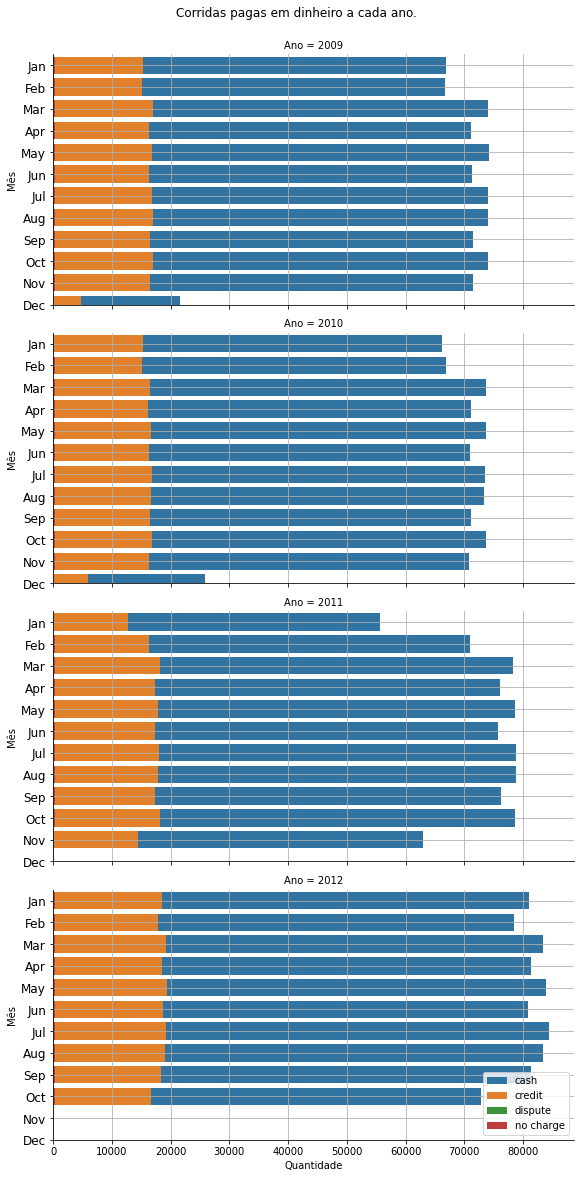

In [12]:
statement = '''
SELECT strftime("%Y", pickup_datetime), strftime("%m", pickup_datetime), COUNT('vendor_id'), lower(payment_type)
FROM ride_hist
GROUP BY strftime("%Y-%m", pickup_datetime) || lower(payment_type)
'''

month_cash_pays, description = fetch_database(os.path.join('.','data','NYC_taxi.db'), statement)

df = pd.DataFrame(data = month_cash_pays, columns=['Ano','Mês','Quantidade','payment_type'])

g = sns.FacetGrid(df, row='Ano', hue='payment_type',height=4, aspect=2)
g.map(sns.barplot, 'Quantidade', 'Mês',orient='h')
g.set_titles(fontsize=fontsize)
plt.yticks(range(0,12), [calendar.month_abbr[i] for i in range(1,13)], fontsize=fontsize)
g.fig.suptitle('Corridas pagas em dinheiro a cada ano.',y=1.02)
plt.legend()
for i in g.axes:
    i[0].set_yticklabels([calendar.month_abbr[i] for i in range(1,13)], fontsize=fontsize)
    i[0].grid()

### Faça um gráfico de série temporal contando a quantidade de gorjetas de cada dia, nos últimos 3 meses de 2012.

Com o gráfico abaixo pode visualizar a quantidade de gorjetas e o valor total das gorjetas a cada dia. Os dados de 2012 se encerram em outubro, então foi possível apresentar apenas os valores correspontes ao respectivo mês do último trimestre.

É interessante observar que apesar de alguns dias terem uma quantidade de gorjetas pagar muito maior, essa quantidade não significa um valor maior arrecadado.

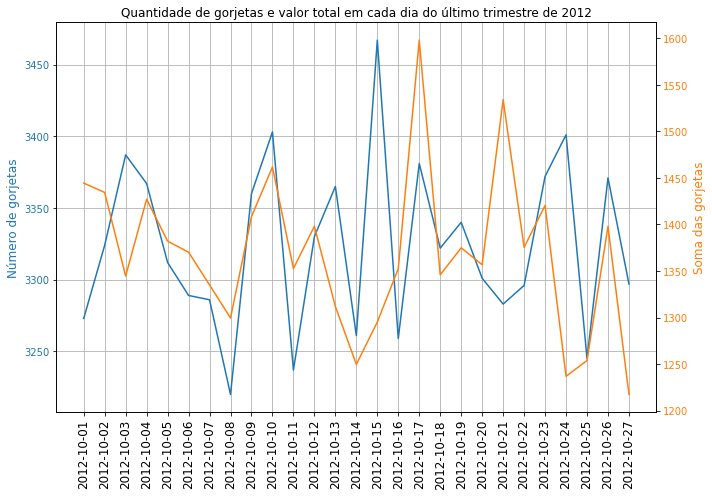

In [13]:
statement = '''
SELECT DATE(pickup_datetime), COUNT(tip_amount), SUM(tip_amount)
FROM ride_hist
WHERE
DATE(pickup_datetime) >= "2012-10-01"
GROUP BY DATE(pickup_datetime)'''

daily_tips_count, description = fetch_database(os.path.join('.','data','NYC_taxi.db'), statement)

x, y1, y2 = zip(*daily_tips_count)


fig, ax1 = plt.subplots(figsize=(10,7))
plt.title('Quantidade de gorjetas e valor total em cada dia do último trimestre de 2012')

color = 'tab:blue'
ax1.set_ylabel('Número de gorjetas', color=color, fontsize=fontsize)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation = 90, fontsize=fontsize)
plt.grid()

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Soma das gorjetas', color=color, fontsize=fontsize)
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

***

## Quesitos bônus

### Qual o tempo médio das corridas nos dias de sábado e domingo;

Utilizando as funções "strftime('%w', pickup_datetime)" para identificar os dias da semana e subtraindo o momento de entrada com o de saída em segundos, pode-se encontrar o tempo médio de viagem nos finais de semana.

In [14]:
statement = '''
SELECT AVG(strftime('%s', dropoff_datetime) - strftime('%s', pickup_datetime))
FROM ride_hist
WHERE
strftime('%w', pickup_datetime) == '0'
OR
strftime('%w', pickup_datetime) == '6'
'''
wkd_ride_time, description = fetch_database(os.path.join('.','data','NYC_taxi.db'), statement)
print(f'Tempo médio das corridas aos finais de semana: ')
print(f'{wkd_ride_time[0][0]:.3f} segundos')
timedelta = pd.Timedelta(wkd_ride_time[0][0], unit = 'sec')
print(f'ou aproximadamente {timedelta.seconds // 60:02d} minutos e {timedelta.seconds%60} segundos')

Tempo médio das corridas aos finais de semana: 
524.791 segundos
ou aproximadamente 08 minutos e 44 segundos


### Fazer uma visualização em mapa com latitude e longitude de pickups and dropoffs no ano de 2010;

O mapa abaixo mostra a soma de embarques e desembarques nas várias ZCTAs de Nova York. O arquivo GeoJson das ZCTAs de Nova York pode ser encontrado no site: https://geo.nyu.edu/catalog/nyu-2451-34509.

Pode-se observar que os locais com maior registro de corridas de taxi estão localizados em Manhattan, distrito mais caro de Nova York e próximo a dois aeroportos da cidade. 

In [15]:
#For implementation details refer to Codes_and_Scripts.ipynb in "Quesitos Bonus" section.

location = gpd.read_file(os.path.join('.','data','nyc_zip_with_counts.geojson'))
nyc = location[['zcta', 'pickup_count', 'dropoff_count','total_count','geometry']]
nyc.explore(column = 'total_count', cmap='rainbow', vmax=10000)

Ressalta-se que a escala foi alterada para melhorar a visualização, tendo-se imposto o valor máximo ao de 10 000 embarques/desembarques, valor que se aproxima ao quantil de 85% das ZCTAs.

A tabela abaixo mostra as estatísticas correspondentes às ZCTAs. Pode-se percerber que 85% delas tem valor total da métrica menor que 10 000 mesmo que o maior encontrado chegue a quase 66 000.

In [16]:
nyc_description = nyc.describe().loc[['mean', 'min','max','75%']].append(nyc.quantile(q=0.85).rename('85%'))
nyc_description

,pickup_count,dropoff_count,total_count
mean,4497.088785,4495.663551,8992.752336
min,0.000000,0.000000,0.000000
max,65986.000000,59243.000000,125229.000000
75%,1231.000000,2129.250000,3184.500000
85%,3700.050000,5694.650000,9955.150000


In [17]:
%%capture
!jupyter nbconvert --to html --no-input --no-prompt Analise.ipynb